# Exploring conformational space of selected macrocycles - "1e"; <br /> Part 1: Generation and selection of conformer candidates

In [71]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [1]:
import glob
import py3Dmol

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline 

from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem import rdMolAlign
from rdkit.Chem.Draw import IPythonConsole
from rdkit import rdBase
print(rdBase.rdkitVersion)
import os,time
print( time.asctime())

2017.09.1
Sat Nov 11 15:51:43 2017


In [2]:
# Functions used in this notebook:

def grep_energies_from_sdf_outputs(files):
    energies = {}
    for inp in files:
        with open(inp,'r') as f:
            lines = f.readlines()
            for i, line in enumerate(lines):
                if "M  END" in line:
                    energies[os.path.splitext(os.path.basename(inp))[0]] = float(lines[i+1])
    return energies


def write_to_dict(prefix, suppl):
    moldict = {}
    for i, mol in enumerate(suppl):
        i = i+1 # start from 1
        name = prefix + str(i)
        moldict[name] = mol
    return moldict


## Crystal structure of "1e" macrocycle

In [3]:
cm1 = open('/home/molejniczak/projects/icho/calcs/1e/1e_crystal.xyz','r').read()
vcm1 = py3Dmol.view(width=400,height=400)
vcm1.removeAllModels()
vcm1.addModel(cm1,'xyz')
vcm1.setStyle({'stick':{'radius':0.15,'color':'spectrum'}})
vcm1.setBackgroundColor('0xeeeeee')
vcm1.zoomTo()
vcm1.show()

In [4]:
# we will need this later:
mol1e_suppl = Chem.SDMolSupplier('/home/molejniczak/projects/icho/calcs/1e/balloon/1e_crystal.sdf', removeHs=False)
mol1e       = mol1e_suppl[0]

## Conformers of "1e"

Generated in the Balloon software:

* start: crystal structure of "1e" 
* balloon parameters:

`balloon -f /home/molejniczak/forcefields/MMFF94.mff --rebuildGeometry --nconfs 1000 --nGenerations 300 --maxPostprocessIter 150`

In [5]:
inps_crystal = glob.glob('/home/molejniczak/projects/icho/calcs/1e/balloon/1e_crystal_balloonoutput_parsed/*.sdf')

In [6]:
e_crystal = grep_energies_from_sdf_outputs(inps_crystal)

In [10]:
# write conformers to dictionaries
   
suppl_crystal  = Chem.SDMolSupplier('/home/molejniczak/projects/icho/calcs/1e/balloon/1e_crystal_balloonoutput.sdf', removeHs=False)
allmol_crystal = write_to_dict("1e_crystal_", suppl_crystal)

In [12]:
print("Sorted energy of all generated conformers of 1e and the energy differences with respect to the lowest:")
energy_crystal_sorted = sorted(e_crystal.items(), key=lambda x: x[1])
energy_crystal_diff = []
e_crystal_min = energy_crystal_sorted[0][1]
for e in energy_crystal_sorted:
    e_diff = e[1] - e_crystal_min
    energy_crystal_diff.append([e[0], e[1], e_diff])

e_crystal_df = pd.DataFrame(energy_crystal_diff, columns=["conformer", "E", "E - Emin"])
e_crystal_df.index += 1 
e_crystal_df

Sorted energy of all generated conformers of 1e and the energy differences with respect to the lowest:


,conformer,E,E - Emin
1,1e_crystal_balloonoutput_1,99.959285,0.000000
2,1e_crystal_balloonoutput_2,100.735110,0.775825
3,1e_crystal_balloonoutput_3,100.816859,0.857574
4,1e_crystal_balloonoutput_4,100.862612,0.903327
5,1e_crystal_balloonoutput_5,100.865772,0.906488
6,1e_crystal_balloonoutput_6,100.876562,0.917277
7,1e_crystal_balloonoutput_7,100.916913,0.957628
8,1e_crystal_balloonoutput_8,101.025249,1.065964
9,1e_crystal_balloonoutput_9,101.027605,1.068320
10,1e_crystal_balloonoutput_10,101.089044,1.129760


### Analysis

First, let's look at the histogram of the energy differences:

(array([  1.,   5.,   6.,   7.,   7.,   9.,  10.,   7.,   5.,  13.,  10.,
          7.,   7.,  17.,  11.,  11.,   6.,  14.,  15.,  27.,  34.,  53.,
         64.,  71.,  69.,  46.,  58.,  38.,  37.,  46.]),
 array([  0.        ,   0.46665031,   0.93330063,   1.39995094,
          1.86660126,   2.33325157,   2.79990189,   3.2665522 ,
          3.73320251,   4.19985283,   4.66650314,   5.13315346,
          5.59980377,   6.06645408,   6.5331044 ,   6.99975471,
          7.46640503,   7.93305534,   8.39970566,   8.86635597,
          9.33300628,   9.7996566 ,  10.26630691,  10.73295723,
         11.19960754,  11.66625785,  12.13290817,  12.59955848,
         13.0662088 ,  13.53285911,  13.99950943]),
 <a list of 30 Patch objects>)

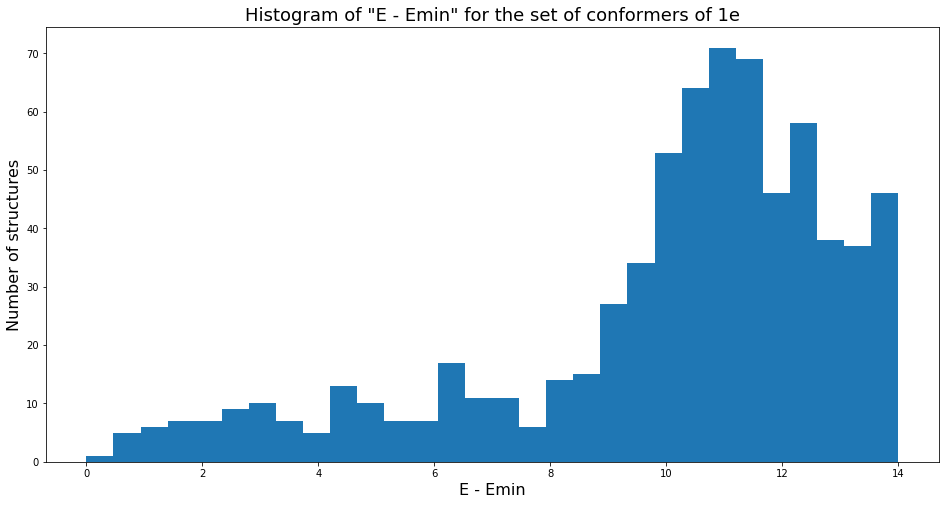

In [73]:
fig, ax = plt.subplots(figsize=(16,8))

ax.set_xlabel('E - Emin', fontsize=16)
ax.set_ylabel('Number of structures', fontsize=16)
ax.set_title('Histogram of "E - Emin" for the set of conformers of 1e', fontsize=18)

ax.hist(e_crystal_df["E - Emin"], bins=30)

## Conformers of a complex of 1e with Cl- ions

Generated in the Balloon software:

* start: crystal structure of "1e"  with Cl- ions added manually in Avogadro "outside" and "inside" the U-shaped 1e;
* balloon parameters:

`balloon -f /home/molejniczak/forcefields/MMFF94.mff --rebuildGeometry --nconfs 1000 --nGenerations 300 --maxPostprocessIter 150`

In [14]:
inps_cl_in  = glob.glob('/home/molejniczak/projects/icho/calcs/1e/balloon/1e_cl-in_balloonoutput_parsed/*.sdf')
inps_cl_out = glob.glob('/home/molejniczak/projects/icho/calcs/1e/balloon/1e_cl-out_balloonoutput_parsed/*.sdf')

In [15]:
e_cl_in  = grep_energies_from_sdf_outputs(inps_cl_in)
e_cl_out = grep_energies_from_sdf_outputs(inps_cl_out)

In [16]:
# write conformers to dictionaries
   
suppl_cl_in  = Chem.SDMolSupplier('/home/molejniczak/projects/icho/calcs/1e/balloon/1e_cl-in_balloonoutput.sdf', removeHs=False)
suppl_cl_out = Chem.SDMolSupplier('/home/molejniczak/projects/icho/calcs/1e/balloon/1e_cl-out_balloonoutput.sdf', removeHs=False)

allmol_cl_in  = write_to_dict("1e_cl-in_",  suppl_cl_in)
allmol_cl_out = write_to_dict("1e_cl-out_", suppl_cl_in)

allmol_cl = {}
allmol_cl.update(allmol_cl_in)
allmol_cl.update(allmol_cl_out)

e_cl = {}
e_cl.update(e_cl_in)
e_cl.update(e_cl_out)

In [20]:
print("Sorted energy of all generated conformers of '1e-Cl-' and the energy differences with respect to the lowest:")
energy_cl_sorted = sorted(e_cl.items(), key=lambda x: x[1])
energy_cl_diff = []
e_cl_min = energy_cl_sorted[0][1]
for e in energy_cl_sorted:
    e_diff = e[1] - e_cl_min
    energy_cl_diff.append([e[0], e[1], e_diff])

e_cl_df = pd.DataFrame(energy_cl_diff, columns=["conformer", "E", "E - Emin"])
e_cl_df.index += 1
e_cl_df

Sorted energy of all generated conformers of '1e-Cl-' and the energy differences with respect to the lowest:


,conformer,E,E - Emin
1,1e_cl-out_balloonoutput_1,98.041978,0.000000
2,1e_cl-out_balloonoutput_2,98.099561,0.057583
3,1e_cl-out_balloonoutput_3,98.300823,0.258845
4,1e_cl-out_balloonoutput_4,98.318090,0.276112
5,1e_cl-out_balloonoutput_5,98.503878,0.461900
6,1e_cl-out_balloonoutput_6,98.578369,0.536391
7,1e_cl-out_balloonoutput_7,98.602419,0.560441
8,1e_cl-out_balloonoutput_8,98.664052,0.622074
9,1e_cl-out_balloonoutput_9,98.738550,0.696571
10,1e_cl-out_balloonoutput_10,98.770683,0.728705


### Analysis

First, let's look at the histogram of the energy differences:

(array([   5.,   10.,    8.,    9.,   10.,   17.,   14.,   15.,   26.,
          20.,   21.,   21.,   22.,   25.,   33.,   36.,   28.,   47.,
          58.,  106.,  119.,  124.,  119.,   92.,  106.,   87.,   78.,
          54.,   42.,   23.]),
 array([  0.        ,   0.52117567,   1.04235133,   1.563527  ,
          2.08470266,   2.60587833,   3.12705399,   3.64822966,
          4.16940533,   4.69058099,   5.21175666,   5.73293232,
          6.25410799,   6.77528365,   7.29645932,   7.81763498,
          8.33881065,   8.85998632,   9.38116198,   9.90233765,
         10.42351331,  10.94468898,  11.46586464,  11.98704031,
         12.50821598,  13.02939164,  13.55056731,  14.07174297,
         14.59291864,  15.1140943 ,  15.63526997]),
 <a list of 30 Patch objects>)

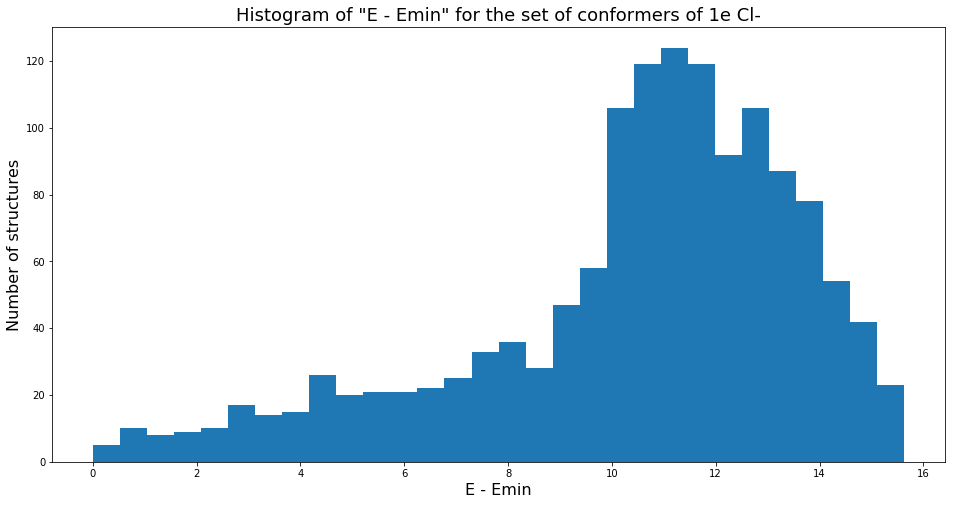

In [72]:
fig, ax = plt.subplots(figsize=(16,8))

ax.set_xlabel('E - Emin', fontsize=16)
ax.set_ylabel('Number of structures', fontsize=16)
ax.set_title('Histogram of "E - Emin" for the set of conformers of 1e Cl-', fontsize=18)

ax.hist(e_cl_df["E - Emin"], bins=30)

We can try to build the distance matrix for atoms of non-bonded molecules. For the 1e Cl- complex it means that we will calculate the distances between the Cl ion and all atoms in the 1e macrocycle:

In [26]:
dist_intermol = {}

natoms_1e=mol1e.GetNumAtoms()
# Cl- is always the last one on *xyz or *sdf files of 1e-cl-:
natom_cl=natoms_1e

for key, mol in allmol_cl.items():
    conf = mol.GetConformer()
    dist_array = []
    for i in range(0, natoms_1e):
        dist=Chem.rdMolTransforms.GetBondLength(conf, i, natom_cl)
        dist_array.append([i, dist])
    dist_intermol[key] = dist_array

#dist_intermol

Let's now have a look at average distances between Cl- and:
* O atoms from amide groups (id: 1, 2, 3, 4)
* N atoms from amide groups (id: 5, 13, 24, 32)
* H atoms from NH from amide groups (id: 6, 14, 25, 33)

remember that rdkit numbers atoms from 0, so the indices we want are:
* 0, 1, 2, 3 for O atoms
* 4, 12, 23, 31 for N atoms
* 5, 13, 24, 32 for H atoms from NH groups

In [64]:
av_dist_cl_o = {}
av_dist_cl_n = {}
av_dist_cl_h = {}
min_dist_cl_o = {}
min_dist_cl_n = {}
min_dist_cl_h = {}
alldata = []

for key, val in dist_intermol.items():
    d1 = 0
    d2 = 0
    d3 = 0
    min_d1=10
    min_d2=10
    min_d3=10
    for v in val:
        if v[0] in [0, 1, 2, 3]:
            # cl - o
            d1 += v[1]
            if v[1] < min_d1:
                min_d1 = v[1]
        elif v[0] in [4, 12, 23, 31]:
            # cl - n
            d2 += v[1]
            if v[1] < min_d2:
                min_d2= v[1]            
        elif v[0] in [5, 13, 24, 32]:
            # cl - h (for h in nh in amide groups)
            d3 += v[1]
            if v[1] < min_d3:
                min_d3= v[1]            
    av_dist_cl_o[key] = d1/4.0
    av_dist_cl_n[key] = d2/4.0
    av_dist_cl_h[key] = d3/4.0    
    min_dist_cl_o[key] = min_d1
    min_dist_cl_n[key] = min_d2
    min_dist_cl_h[key] = min_d3
    alldata.append([key, av_dist_cl_o[key], av_dist_cl_n[key], av_dist_cl_h[key], 
                    min_dist_cl_o[key], min_dist_cl_n[key], min_dist_cl_h[key]])
    
distances = pd.DataFrame(alldata,
                        columns=["mol", "av-cl-o", "av-cl-n", "av-cl-h", "min-cl-o", "min-cl-n", "min-cl-h"])
                   

then let's make histograms for this data:

(array([  12.,   12.,   30.,   38.,   50.,   52.,   56.,   80.,   72.,
          78.,  110.,   94.,  114.,   86.,   88.,   72.,  104.,   66.,
         104.,  100.,   72.,   36.,    4.,    8.,    0.,    0.,    2.,
           0.,    0.,    4.]),
 array([ 3.37689097,  3.47792071,  3.57895045,  3.67998019,  3.78100993,
         3.88203967,  3.98306941,  4.08409916,  4.1851289 ,  4.28615864,
         4.38718838,  4.48821812,  4.58924786,  4.69027761,  4.79130735,
         4.89233709,  4.99336683,  5.09439657,  5.19542631,  5.29645606,
         5.3974858 ,  5.49851554,  5.59954528,  5.70057502,  5.80160476,
         5.90263451,  6.00366425,  6.10469399,  6.20572373,  6.30675347,
         6.40778321]),
 <a list of 30 Patch objects>)

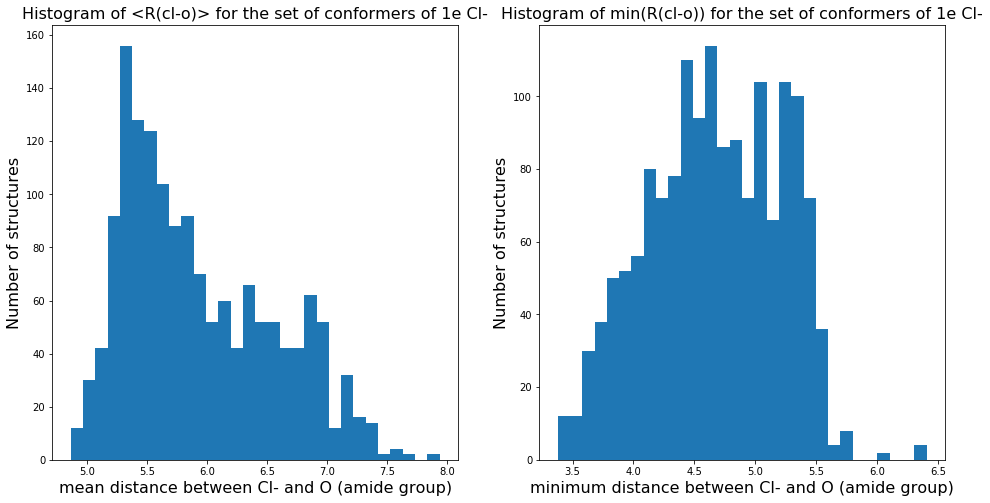

In [70]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(16,8))

ax0.set_xlabel('mean distance between Cl- and O (amide group)', fontsize=16)
ax0.set_ylabel('Number of structures', fontsize=16)
ax0.set_title('Histogram of <R(cl-o)> for the set of conformers of 1e Cl-', fontsize=16)

ax1.set_xlabel('minimum distance between Cl- and O (amide group)', fontsize=16)
ax1.set_ylabel('Number of structures', fontsize=16)
ax1.set_title('Histogram of min(R(cl-o)) for the set of conformers of 1e Cl-', fontsize=16)

ax0.hist(distances["av-cl-o"], bins=30)
ax1.hist(distances["min-cl-o"], bins=30)

(array([ 18.,  28.,  64.,  78.,  90.,  86.,  66.,  68.,  66.,  72.,  92.,
         82.,  72.,  84.,  94.,  74.,  78.,  60.,  68.,  44.,  36.,  46.,
         24.,  18.,  18.,   6.,   4.,   4.,   2.,   2.]),
 array([ 3.44546937,  3.52811247,  3.61075557,  3.69339867,  3.77604177,
         3.85868487,  3.94132797,  4.02397108,  4.10661418,  4.18925728,
         4.27190038,  4.35454348,  4.43718658,  4.51982968,  4.60247278,
         4.68511588,  4.76775898,  4.85040208,  4.93304519,  5.01568829,
         5.09833139,  5.18097449,  5.26361759,  5.34626069,  5.42890379,
         5.51154689,  5.59418999,  5.67683309,  5.7594762 ,  5.8421193 ,
         5.9247624 ]),
 <a list of 30 Patch objects>)

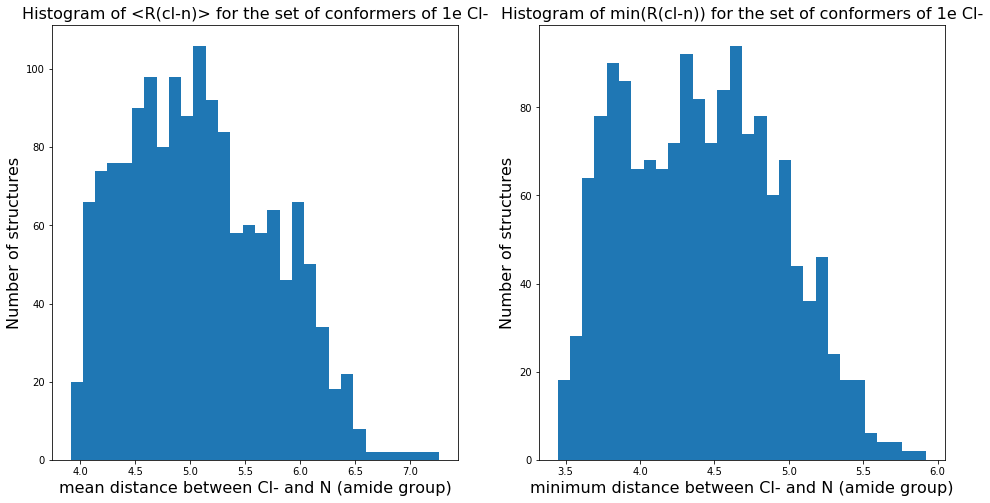

In [69]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(16,8))

ax0.set_xlabel('mean distance between Cl- and N (amide group)', fontsize=16)
ax0.set_ylabel('Number of structures', fontsize=16)
ax0.set_title('Histogram of <R(cl-n)> for the set of conformers of 1e Cl-', fontsize=16)

ax1.set_xlabel('minimum distance between Cl- and N (amide group)', fontsize=16)
ax1.set_ylabel('Number of structures', fontsize=16)
ax1.set_title('Histogram of min(R(cl-n)) for the set of conformers of 1e Cl-', fontsize=16)

ax0.hist(distances["av-cl-n"], bins=30)
ax1.hist(distances["min-cl-n"], bins=30)

(array([   6.,   28.,   70.,   68.,   46.,   68.,   60.,   66.,   54.,
          70.,   92.,  104.,  106.,   88.,  122.,   92.,   62.,   44.,
          40.,   44.,   46.,   40.,   34.,   30.,   28.,   14.,   12.,
           4.,    2.,    4.]),
 array([ 2.47905126,  2.59948549,  2.71991973,  2.84035397,  2.9607882 ,
         3.08122244,  3.20165668,  3.32209091,  3.44252515,  3.56295939,
         3.68339362,  3.80382786,  3.9242621 ,  4.04469633,  4.16513057,
         4.28556481,  4.40599904,  4.52643328,  4.64686752,  4.76730175,
         4.88773599,  5.00817023,  5.12860446,  5.2490387 ,  5.36947294,
         5.48990717,  5.61034141,  5.73077565,  5.85120988,  5.97164412,
         6.09207836]),
 <a list of 30 Patch objects>)

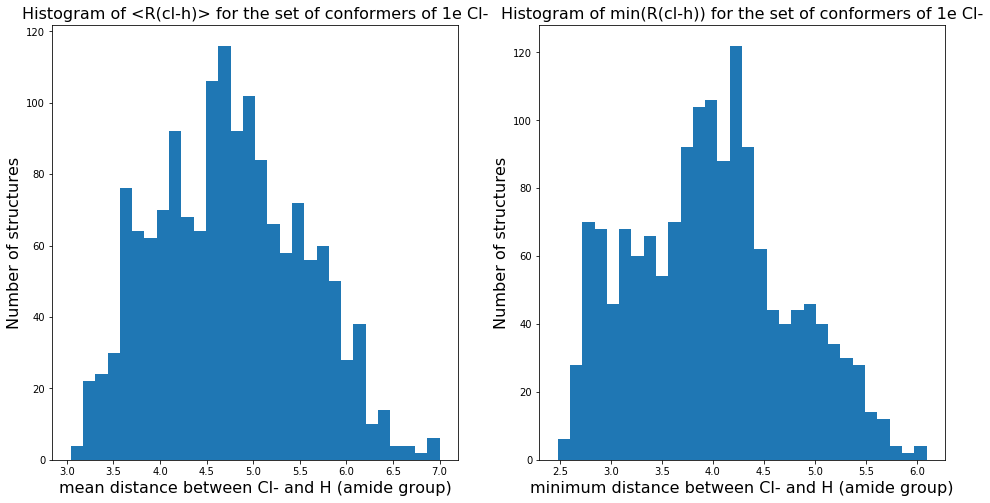

In [68]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(16,8))

ax0.set_xlabel('mean distance between Cl- and H (amide group)', fontsize=16)
ax0.set_ylabel('Number of structures', fontsize=16)
ax0.set_title('Histogram of <R(cl-h)> for the set of conformers of 1e Cl-', fontsize=16)

ax1.set_xlabel('minimum distance between Cl- and H (amide group)', fontsize=16)
ax1.set_ylabel('Number of structures', fontsize=16)
ax1.set_title('Histogram of min(R(cl-h)) for the set of conformers of 1e Cl-', fontsize=16)

ax0.hist(distances["av-cl-h"], bins=30)
ax1.hist(distances["min-cl-h"], bins=30)